In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
# root_file = '/home/dhasade/audits/ml-audits/results/german_credit/merged_german_credit_stratified_n2.csv'
# root_file = '/home/dhasade/audits/ml-audits/results/propublica/merged_propublica_stratified_n2.csv'
# root_file = '/home/dhasade/audits/ml-audits/results/folktables/merged_folktables_stratified_n2.csv'

# root_file = '/home/dhasade/audits/ml-audits/results/german_credit/merged_german_credit_neyman_n5.csv'
root_file = '/home/dhasade/audits/ml-audits/results/german_credit/merged_german_credit_stratified_n5.csv'

In [3]:
df = pd.read_csv(root_file)

In [23]:
collaboration_map = {
    'none': 'No Collab.',
    'apriori (unbiased)': 'Apriori',
    'apriori': 'Apriori',
    'aposteriori' : 'Aposteriori'
}

In [5]:
aggregated_df = df.groupby(['budget', 'dataset', 'collaboration', 'sample', 'agent', 'attribute'])['dp_error'].mean().reset_index()

# get separate dataframes for each agent
agent0_df = aggregated_df[aggregated_df['agent'] == 0] # age
agent1_df = aggregated_df[aggregated_df['agent'] == 1] # sex

In [6]:
aggregated_df.head()

,budget,dataset,collaboration,sample,agent,attribute,dp_error
0,50,german_credit,aposteriori,stratified,0,age,0.053797
1,50,german_credit,aposteriori,stratified,1,sex,0.040924
2,50,german_credit,aposteriori,stratified,2,marital_status,0.039118
3,50,german_credit,aposteriori,stratified,3,own_telephone,0.031995
4,50,german_credit,aposteriori,stratified,4,employment,0.045922


In [7]:
s = 7
params = {
   'legend.fontsize': s,
   'xtick.labelsize': 6,
   'ytick.labelsize': 6,
   'axes.labelsize': s,
   'text.usetex': False,
   # 'figure.figsize': [1.3, 1.1],
   'figure.figsize': [3.2, 1.1],
   'lines.linewidth': 1,
   'lines.markersize': 3,
   'axes.titlesize': s,
   }

# set rc params
plt.rcParams.update(params)


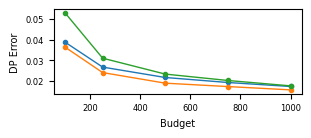

In [74]:
# Plot separately for each agent
# Agent 0: Age

# Plot budget vs. error, grouped by collaboration column
for collaboration, group in agent0_df.groupby('collaboration'):
    plt.plot(group['budget'], group['dp_error'], label=collaboration_map[collaboration], marker='o')

plt.ylabel('DP Error')
plt.xlabel('Budget')
# plt.legend()

# save plot to file
plot_name = 'gc_agent0_AGE_dp_error_vs_budget.pdf'
# plt.savefig(f'../results/plots/{plot_name}', bbox_inches='tight', dpi=300)


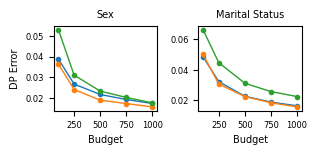

In [75]:
# plot for each agent side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2)

# no background for the legend
plt.rc('legend', frameon=False)    # no background for the legend

# Plot budget vs. error, grouped by collaboration column
for collaboration, group in agent0_df.groupby('collaboration'):
    ax1.plot(group['budget'], group['dp_error'], label=collaboration_map[collaboration], marker='o')

    ax1.set_ylabel('DP Error')
    ax1.set_xlabel('Budget')
    
    # ax1.set_title('Age')
    ax1.set_title('Sex')

    # # set xticks at 250, 500, 750, 1000
    # ax1.set_xticks([250, 500, 750, 1000])

    # ax1.legend()

# Plot budget vs. error, grouped by collaboration column
for collaboration, group in agent1_df.groupby('collaboration'):
    ax2.plot(group['budget'], group['dp_error'], label=collaboration_map[collaboration], marker='o')

    # ax2.set_ylabel('DP Error')
    ax2.set_xlabel('Budget')
    
    # ax2.set_title('Sex')
    # ax2.set_title('African-American')
    ax2.set_title('Marital Status')
    
    # ax2.legend()

    # # set xticks at 250, 500, 750
    # ax2.set_xticks([250, 500, 750])


# set legend location outside, at the top of the plot with 2 columns
# ax2.legend(bbox_to_anchor=(1.1, 1.5), loc='upper right', ncol=3)

# add space between subplots
plt.subplots_adjust(wspace=0.4)

# save plot to file
# plot_name = 'gc_dp_error_vs_budget.pdf'
# plot_name = 'propublica_dp_error_vs_budget.pdf'
plot_name = 'folktables_dp_error_vs_budget.pdf'
# plt.savefig(f'../results/plots/{plot_name}', bbox_inches='tight', dpi=300)

In [11]:
# save the csv
# aggregated_df.to_csv('../results/plots_data/gc_2agents.csv', index=False)
# aggregated_df.to_csv('../results/plots_data/pp_2agents.csv', index=False)
# aggregated_df.to_csv('../results/plots_data/ft_2agents.csv', index=False)

In [7]:
# sum the values for each agent
new_aggregated_df = aggregated_df.groupby(['budget', 'dataset', 'collaboration', 'sample'])['dp_error'].sum().reset_index()

In [8]:
s = 7
params = {
   'legend.fontsize': s,
   'xtick.labelsize': 6,
   'ytick.labelsize': 6,
   'axes.labelsize': s,
   'text.usetex': False,
   'figure.figsize': [2.3, 1.3],
#    'figure.figsize': [3.2, 1.1],
   'lines.linewidth': 1,
   'lines.markersize': 3,
   'axes.titlesize': s,
   }

# set rc params
plt.rcParams.update(params)
# no background for the legend
plt.rc('legend', frameon=False)    # no background for the legend


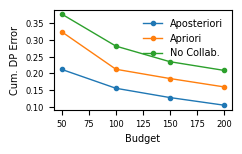

In [9]:
# Plot budget vs. error, grouped by collaboration column
for collaboration, group in new_aggregated_df.groupby('collaboration'):
    plt.plot(group['budget'], group['dp_error'], label=collaboration_map[collaboration], marker='o')

plt.ylabel('Cum. DP Error')
plt.xlabel('Budget')
plt.legend()

# plot_name = 'ft_cum_dp_error_vs_budget.pdf'
# plot_name = 'pp_cum_dp_error_vs_budget.pdf'
# plot_name = 'gc_neyman_cum_dp_error_vs_budget.pdf'
plot_name = 'gc_stratified_cum_dp_error_vs_budget.pdf'
# plt.savefig(f'../results/plots/{plot_name}', bbox_inches='tight', dpi=300)

In [1]:
from typing import List, Dict, Tuple

## Plotting apriori results

In [41]:
n = 2
apriori_neyman_dir = f'/home/dhasade/audits/ml-audits/results/german_credit/merged_german_credit_neyman_n{n}.csv'
apriori_stratified_dir = f'/home/dhasade/audits/ml-audits/results/german_credit/merged_german_credit_stratified_n{n}.csv'

In [42]:
df_neyman = pd.read_csv(apriori_neyman_dir)
df_stratified = pd.read_csv(apriori_stratified_dir)

In [43]:
aggregated_df_neyman = df_neyman.groupby(['budget', 'dataset', 'collaboration', 'sample', 'agent', 'attribute'])['dp_error'].mean().reset_index()
aggregated_df_stratified = df_stratified.groupby(['budget', 'dataset', 'collaboration', 'sample', 'agent', 'attribute'])['dp_error'].mean().reset_index()

In [44]:
# sum the values for each agent
new_aggregated_df_neyman = aggregated_df_neyman.groupby(['budget', 'dataset', 'collaboration', 'sample'])['dp_error'].sum().reset_index()
new_aggregated_df_stratified = aggregated_df_stratified.groupby(['budget', 'dataset', 'collaboration', 'sample'])['dp_error'].sum().reset_index()

In [45]:
s = 7
params = {
   'legend.fontsize': s,
   'xtick.labelsize': 6,
   'ytick.labelsize': 6,
   'axes.labelsize': s,
   'text.usetex': False,
   'figure.figsize': [2.3, 1.3],
#    'figure.figsize': [3.2, 1.1],
   'lines.linewidth': 1,
   'lines.markersize': 3,
   'axes.titlesize': s,
   }

# set rc params
plt.rcParams.update(params)
# no background for the legend
plt.rc('legend', frameon=False)    # no background for the legend

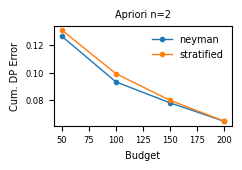

In [47]:
# Plot budget vs. error for each strategy at collaboration = apriori
for collab, group in new_aggregated_df_neyman.groupby('collaboration'):
    if collab == 'apriori (unbiased)':
        plt.plot(group['budget'], group['dp_error'], label='neyman', marker='o')

for collab, group in new_aggregated_df_stratified.groupby('collaboration'):
    if collab == 'apriori (unbiased)':
        plt.plot(group['budget'], group['dp_error'], label='stratified', marker='o')

plt.ylabel('Cum. DP Error')
plt.xlabel('Budget')
plt.title(f'Apriori n={n}')
plt.legend()

plot_name = f'gc_apriori_n{n}_cum_dp_error_vs_budget.pdf'
# plt.savefig(f'../results/plots/{plot_name}', bbox_inches='tight', dpi=300)

In [87]:
# propublica

# uniform
uniform_dir = f'/home/dhasade/audits/ml-audits/results/propublica/merged_propublica_uniform_n2.csv'
uniform_df = pd.read_csv(uniform_dir)

# stratified
stratified_dir = f'/home/dhasade/audits/ml-audits/results/propublica/merged_propublica_stratified_n2.csv'
stratified_df = pd.read_csv(stratified_dir)

# neyman
neyman_dir = f'/home/dhasade/audits/ml-audits/results/propublica/merged_propublica_neyman_n2.csv'
neyman_df = pd.read_csv(neyman_dir)

In [79]:
# german_credit

# uniform
uniform_dir = f'/home/dhasade/audits/ml-audits/results/german_credit/merged_german_credit_uniform_n2.csv'
uniform_df = pd.read_csv(uniform_dir)

# stratified
stratified_dir = f'/home/dhasade/audits/ml-audits/results/german_credit/merged_german_credit_stratified_n2.csv'
stratified_df = pd.read_csv(stratified_dir)

# neyman
neyman_dir = f'/home/dhasade/audits/ml-audits/results/german_credit/merged_german_credit_neyman_n2.csv'
neyman_df = pd.read_csv(neyman_dir)

In [88]:
aggregated_df_uniform = uniform_df.groupby(['budget', 'dataset', 'collaboration', 'sample', 'agent', 'attribute'])['dp_error'].mean().reset_index()
# sum the values for each agent
new_aggregated_df_uniform = aggregated_df_uniform.groupby(['budget', 'dataset', 'collaboration', 'sample'])['dp_error'].sum().reset_index()

In [89]:
aggregated_df_stratified = stratified_df.groupby(['budget', 'dataset', 'collaboration', 'sample', 'agent', 'attribute'])['dp_error'].mean().reset_index()
# sum the values for each agent
new_aggregated_df_stratified = aggregated_df_stratified.groupby(['budget', 'dataset', 'collaboration', 'sample'])['dp_error'].sum().reset_index()

In [90]:
aggregated_df_neyman = neyman_df.groupby(['budget', 'dataset', 'collaboration', 'sample', 'agent', 'attribute'])['dp_error'].mean().reset_index()
# sum the values for each agent
new_aggregated_df_neyman = aggregated_df_neyman.groupby(['budget', 'dataset', 'collaboration', 'sample'])['dp_error'].sum().reset_index()

In [91]:
# save the csv for gc
# new_aggregated_df_uniform.to_csv('../results/plots_data/gc_uniform_budget_vs_cum_error.csv', index=False)
# new_aggregated_df_stratified.to_csv('../results/plots_data/gc_stratified_budget_vs_cum_error.csv', index=False)
# new_aggregated_df_neyman.to_csv('../results/plots_data/gc_neyman_budget_vs_cum_error.csv', index=False)

# save the csv for pp
# new_aggregated_df_uniform.to_csv('../results/plots_data/pp_uniform_budget_vs_cum_error.csv', index=False)
# new_aggregated_df_stratified.to_csv('../results/plots_data/pp_stratified_budget_vs_cum_error.csv', index=False)
# new_aggregated_df_neyman.to_csv('../results/plots_data/pp_neyman_budget_vs_cum_error.csv', index=False)


In [92]:
s = 7
params = {
   'legend.fontsize': s,
   'xtick.labelsize': 6,
   'ytick.labelsize': 6,
   'axes.labelsize': s,
   'text.usetex': False,
   'figure.figsize': [7, 1.2],
#    'figure.figsize': [3.2, 1.1],
   'lines.linewidth': 1,
   'lines.markersize': 3,
   'axes.titlesize': s,
   }

# set rc params
plt.rcParams.update(params)
# no background for the legend
plt.rc('legend', frameon=False)    # no background for the legend

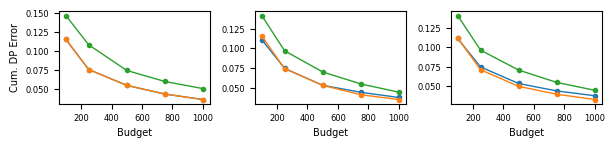

In [94]:
# 1 x 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# plot budget vs. error for uniform for each collaboration
for collab, group in new_aggregated_df_uniform.groupby('collaboration'):
    ax1.plot(group['budget'], group['dp_error'], label=collaboration_map[collab], marker='o')

ax1.set_ylabel('Cum. DP Error')
ax1.set_xlabel('Budget')
# ax1.set_title('Uniform')

# plot budget vs. error for stratified for each collaboration
for collab, group in new_aggregated_df_stratified.groupby('collaboration'):
    ax2.plot(group['budget'], group['dp_error'], label=collaboration_map[collab], marker='o')

ax2.set_xlabel('Budget')
# ax2.set_title('Stratified')

# plot budget vs. error for neyman for each collaboration
for collab, group in new_aggregated_df_neyman.groupby('collaboration'):
    ax3.plot(group['budget'], group['dp_error'], label=collaboration_map[collab], marker='o')

ax3.set_xlabel('Budget')
# ax3.set_title('Neyman')

# set legend location outside, at the top of the plot with 2 columns
# ax3.legend(bbox_to_anchor=(0, 1.5), loc='upper right', ncol=3)

# add space between subplots
plt.subplots_adjust(wspace=0.3)

# save plot to file
plot_name = 'pp_cum_dp_error_vs_budget.pdf'
# plot_name = 'gc_cum_dp_error_vs_budget.pdf'
# plt.savefig(f'../results/plots/{plot_name}', bbox_inches='tight', dpi=300)